<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Practical-Assignment-5" data-toc-modified-id="Practical-Assignment-5-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Practical Assignment 5</a></span><ul class="toc-item"><li><span><a href="#Gaussian-Process-regression" data-toc-modified-id="Gaussian-Process-regression-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Gaussian Process regression</a></span></li><li><span><a href="#Model-1" data-toc-modified-id="Model-1-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model 1</a></span><ul class="toc-item"><li><span><a href="#Posterior-Sampling" data-toc-modified-id="Posterior-Sampling-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Posterior Sampling</a></span></li></ul></li><li><span><a href="#Model-2:-Shared-Values" data-toc-modified-id="Model-2:-Shared-Values-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Model 2: Shared Values</a></span></li></ul></li></ul></div>

# Practical Assignment 5
Write a probabilistic programme in pymc3 which implements a Gaussian Processes Regress to find functions that model the relationship between the following.

x = [0, 0.1, 2, 4] & y = [4, 0.9, 3.6, 5]

## Gaussian Process regression
Gaussian Process regression is a non-parametric approach to regression or data fitting that assumes that observed data points y are generated by some unknown latent function `f(x)`. The latent function `f(x)` is modeled as being multivariate normally distributed (a Gaussian Process)

Denoted as: `f(x)∼GP(m(x;θ),k(x,x′;θ)).`

`m(x;θ)` is the mean function, and `k(x,x′;θ)` is the covariance function. In many applications, the mean function is set to 0 because the data can still be fit well using just covariances.

`θ`  is the set of hyperparameters for either the mean or covariance function. These are the unknown variables. They are usually found by maximizing the marginal likelihood. This approach is much faster computationally than MCMC, but produces a point estimate, `θMAP`.

Source: [Pymc3](https://pymc3-testing.readthedocs.io/en/rtd-docs/notebooks/GP-introduction.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pymc3 as pm
import arviz as az
import theano.tensor as tt
import theano as T

sns.set_style('whitegrid')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Regression 
x = np.array([0, 0.1, 2, 4])
y = np.array([4, 0.9, 3.6, 5])

## Model 1

In [3]:
# A one dimensional column vector of inputs.
X = x[:, None]

In [4]:
with pm.Model() as model_reg:
    # hyperprior for lengthscale kernel parameter
    ℓ = pm.Gamma('ℓ', 2, 0.5)
    # instanciate a covariance function
    cov = pm.gp.cov.ExpQuad(1, ls=ℓ)
    # instanciate a GP prior
    gp = pm.gp.Marginal(cov_func=cov)
    # prior
    ϵ = pm.HalfNormal('ϵ', 0.5)
    # likelihood
    y_pred = gp.marginal_likelihood('y_pred', X=X, y=y, noise=ϵ)
    trace_reg = pm.sample(2000)

<ipython-input-4-6ab356be3bc1>:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_reg = pm.sample(2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Student\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, ℓ]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 91 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


In [5]:
sns.set_palette('Set1')  

C:\Users\Student\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


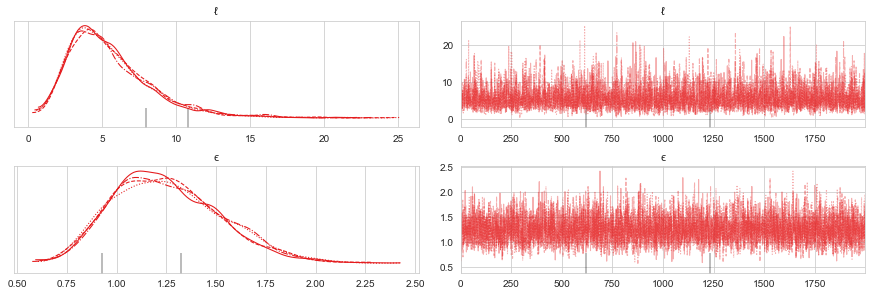

In [6]:
az.plot_trace(trace_reg);

In [7]:
az.summary(trace_reg)

C:\Users\Student\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ℓ,5.534,2.90,1.066,10.846,0.037,0.026,5380.0,4142.0,1.0
ϵ,1.253,0.27,0.793,1.766,0.004,0.003,5221.0,4837.0,1.0


C:\Users\Student\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


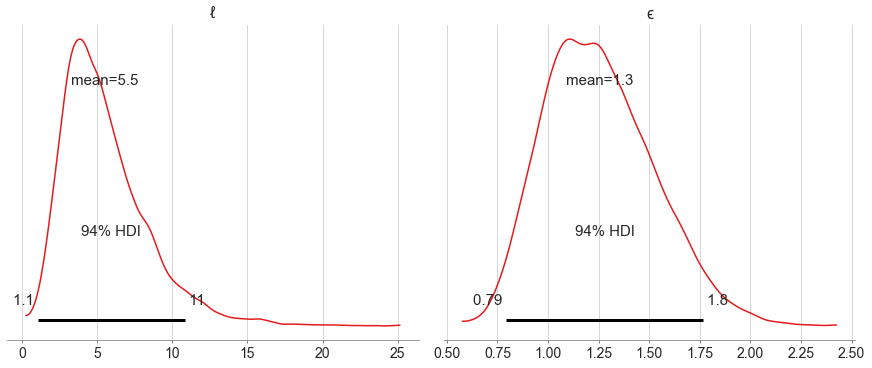

In [8]:
pm.plot_posterior(trace_reg, figsize=(12, 5));

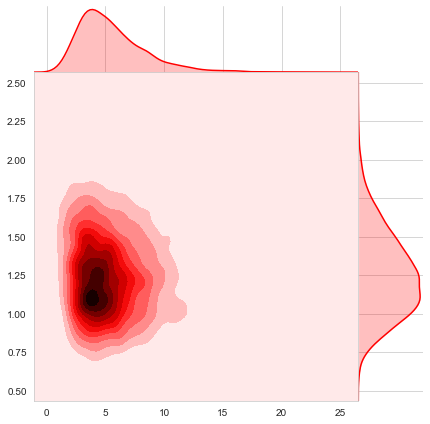

In [9]:
sns.jointplot(x=trace_reg['ℓ'].T,y=trace_reg['ϵ'].T, kind='kde', color='red', space=0);

In [10]:
X_new = np.linspace(np.floor(x.min()), np.ceil(x.max()), 100)[:,None]

In [ ]:
# Posterior Sampling 
with model:
    gp_samples = pm.gp.sample_gp(trace_reg, y_pred, X_new, samples=100, random_seed=42)

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))

[ax.plot(X_new, x, color=cm(0.3), alpha=0.3) for x in gp_samples]
# overlay the observed data
ax.plot(X, y, 'ok', ms=10);
ax.set_xlabel("x");
ax.set_ylabel("f(x)");
ax.set_title("Posterior predictive distribution");

In [11]:
with model_reg:
    f_pred = gp.conditional('f_pred', X_new)

In [ ]:
with model_reg:
    pred_samples = pm.sample_posterior_predictive(trace_reg, vars=[f_pred], samples=82)

In [ ]:
_, ax = plt.subplots(figsize=(12,5))
ax.plot(X_new, pred_samples['f_pred'].T, 'C1-', alpha=0.3)
ax.plot(X, y, 'ko')
ax.set_xlabel('X')

## Model 2: Shared Values

In [12]:
# A one dimensional column vector of inputs.
X = x[:, None]

x_shared = T.shared(X)
y_shared = T.shared(y)

In [13]:
with pm.Model() as model_reg_2:
    # hyperprior for lengthscale kernel parameter
    ℓ = pm.Gamma('ℓ', 2, 0.5)
    # instanciate a covariance function
    cov = pm.gp.cov.ExpQuad(1, ls=ℓ)
    # instanciate a GP prior
    gp = pm.gp.Marginal(cov_func=cov)
    # prior
    ϵ = pm.HalfNormal('ϵ', 0.5)
    # likelihood
    y_pred = gp.marginal_likelihood('y', X=x_shared, y=y_shared, noise=ϵ)
    trace_reg_2 = pm.sample(2000)

C:\Users\Student\anaconda3\lib\site-packages\pymc3\gp\cov.py:92: UserWarning: Only 1 column(s) out of Subtensor{int64}.0 are being used to compute the covariance function. If this is not intended, increase 'input_dim' parameter to the number of columns to use. Ignore otherwise.
  warnings.warn(
<ipython-input-13-87d6564a79d2>:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_reg_2 = pm.sample(2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Student\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, ℓ]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 97 seconds.


C:\Users\Student\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


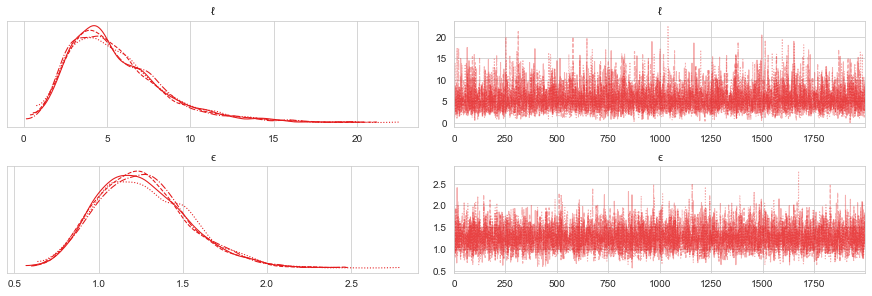

In [14]:
az.plot_trace(trace_reg_2);

In [15]:
az.summary(trace_reg_2)

C:\Users\Student\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ℓ,5.538,2.881,0.922,10.849,0.037,0.027,5928.0,4183.0,1.0
ϵ,1.263,0.273,0.778,1.780,0.003,0.002,6823.0,4887.0,1.0


C:\Users\Student\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


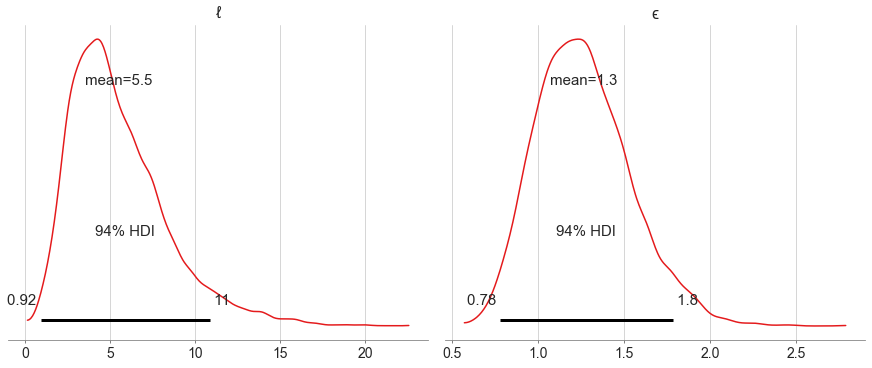

In [16]:
pm.plot_posterior(trace_reg_2, figsize=(12, 5));

In [17]:
X_new = np.linspace(np.floor(x.min()), np.ceil(x.max()), 100)[:,None]
x_shared.set_value(X_new)
y_shared.set_value(np.zeros(len(X_new)))

In [18]:
with model_reg_2:
    pred_samples_2 = pm.sample_posterior_predictive(trace_reg_2, samples=100)

C:\Users\Student\anaconda3\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


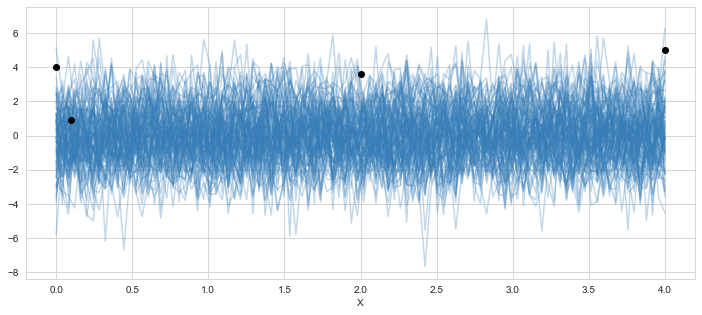

In [21]:
_, ax = plt.subplots(figsize=(12,5))
ax.plot(X_new, pred_samples_2['y'].T, 'C1-', alpha=0.3)
ax.plot(X, y, 'ko')
ax.set_xlabel('X');

In [ ]:
# plot the results
#_, ax = plt.subplots(figsize=(12,5))

# predict
# point = {'ℓ': trace_reg['ℓ'].mean(), 'ϵ': trace_reg['ϵ'].mean()}
# mu, var = gp.predict(X_new, point=point, diag=True)
# sd = var**0.5

# plot mean and 1σ and 2σ intervals
# ax.plot(X_new, mu, 'C1')
# ax.fill_between(X_new.flatten(),
#                 mu - sd, mu + sd,
#                 color="C1",
#                 alpha=0.3)

#ax.fill_between(X_new.flatten(),
#                 mu - 2*sd, mu + 2*sd,
#                 color="C1",
#                 alpha=0.3)

#ax.plot(X, y, 'ko')
#ax.set_xlabel('X');

In [ ]:
#pred_samples['y_pred'].mean(axis=0).T